In [ ]:
!pip install -q pytorch_fid
!pip install -q accelerate
!pip install -q einops
!pip install -q gdown
!pip install -q ema_pytorch
!pip install -q gradio==4.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.1/819.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.6 M

In [ ]:
# 参数设置
model_weights_path = './model-20.pt'
output_save_path = './output_image.png'
batch_size = 3
image_size = 32  # 图片的大小

In [ ]:
!pip install -q -e git+https://github.com/pesser/pytorch_diffusion.git#egg=pytorch_diffusion
%cd src/pytorch-diffusion/

from pytorch_diffusion import Diffusion
sample_diffusion = Diffusion.from_pretrained("ema_cifar10")
samples = sample_diffusion.denoise(batch_size)

# from torchvision import transforms as T, utils
# utils.save_image(samples, f'samples.png', nrow=1)
# plt.imshow(  samples[0].detach().cpu().permute(1, 2, 0)  )

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
/content/src/pytorch-diffusion
Instantiating


143MB [00:18, 7.69MB/s]                           


Loading checkpoint /root/.cache/diffusion_models_converted/ema_diffusion_cifar10_model/model-790000.ckpt
Moved model to cuda


In [ ]:
%cd
# download model checkpoint
!gdown --id 1Op6expA7BtfsxBl8gmriPXKcTI29H8Cy
# download code
!git clone https://github.com/MengYan0901/DL_Homework.git && mv DL_Homework/* . && rm -r DL_Homework

/root
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Op6expA7BtfsxBl8gmriPXKcTI29H8Cy
To: /root/model-20.pt
100% 581M/581M [00:10<00:00, 55.4MB/s]
Cloning into 'DL_Homework'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 290 (delta 68), reused 105 (delta 48), pack-reused 153
Receiving objects: 100% (290/290), 5.66 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [ ]:
import os
import json
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
from models.model import Unet
from models.gaussian_diffusion2 import GaussianDiffusion,Trainer
import matplotlib.pyplot as plt
from PIL import Image
import gradio as gr

In [ ]:
def plt_imgs(samples):
  imgs_number = len(samples)
  samples_np = samples.cpu().numpy()  # Convert to NumPy array if not already

  # Create a single figure with subplots
  fig, axes = plt.subplots(1, imgs_number, figsize=(12, 3))  # Create 1 row with 4 subplots

  # Loop through the samples and plot them
  for i in range(imgs_number):
      # Transpose the image data from (3, 32, 32) to (32, 32, 3) for visualization
      image = samples_np[i].transpose((1, 2, 0))

      # Ensure the pixel values are in the [0, 1] range (assumes they are normalized)
      image = (image - image.min()) / (image.max() - image.min())

      # Display the image on the current subplot
      axes[i].imshow(image)
      axes[i].set_title(f'Output {i+1}')

  # Remove axis labels and ticks
  for ax in axes:
      ax.axis('off')

  # Show the plot
  plt.show()

In [ ]:
def exists(x):
    return x is not None
def inference(pretrained_data, batch_size):
    # data_transforms = [
    # transforms.Resize((32, 32)),
    # transforms.ToTensor(),  # Scales data into [0,1]
    # transforms.Lambda(lambda t: (t * 2) - 1)  # Scale between [-1, 1]
    # ]
    # test_data = torchvision.datasets.CIFAR10(root="./",train=False,transform=data_transforms,download=True)
    test_data = torch.rand(batch_size, 3, 32, 32)
    model = Unet(
        dim=64,
        dim_mults=(1, 2, 4, 8),
        flash_attn=False,
        sinusoidal_pos_emb_theta=1000
    )
    diffusion = GaussianDiffusion(
        model,
        image_size=image_size,
        timesteps=1000)  # number of steps

    trainer = Trainer(diffusion, test_data)

    loaded_data = torch.load(pretrained_data)
    pretrained_model = trainer.accelerator.unwrap_model(trainer.model)
    pretrained_model.load_state_dict(loaded_data['model'])

    trainer.step = loaded_data['step']
    trainer.opt.load_state_dict(loaded_data['opt'])

    trainer.ema.load_state_dict(loaded_data["ema"])

    if exists(trainer.accelerator.scaler) and exists(loaded_data['scaler']):
        trainer.accelerator.scaler.load_state_dict(loaded_data['scaler'])

    return trainer

inference_trainer = inference(model_weights_path, batch_size)
images_list = inference_trainer.ema.ema_model.sample(batch_size=batch_size)
# # Get the state_dict of the model
# state_dict = inference_trainer.ema.state_dict()

# # Get only the keys (parameter names) from the state_dict
# keys = state_dict.keys()

# # Convert keys to a list if neede
# list(keys)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

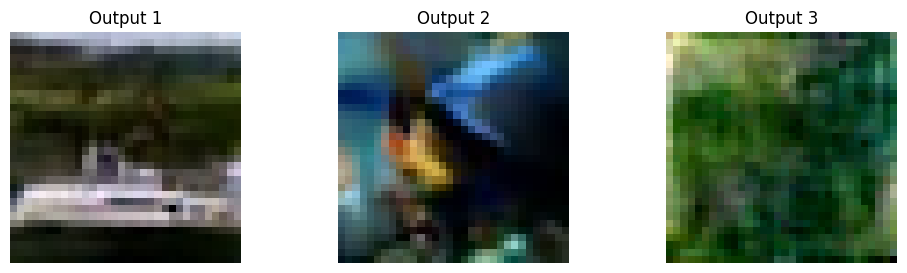

In [ ]:
plt_imgs(images_list)

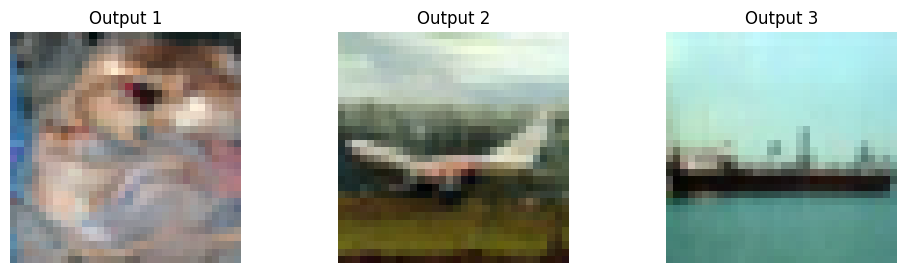

In [ ]:
plt_imgs(samples)

In [ ]:
def show_fn(batch_size):
  inference_trainer = inference(model_weights_path, int(batch_size))
  images_list = inference_trainer.ema.ema_model.sample(batch_size=int(batch_size))

  output_folder = './output_images'
  os.makedirs(output_folder, exist_ok=True)
  output_paths = []

  for i, image in enumerate(images_list):
      np_image = image.detach().cpu().permute(1, 2, 0).numpy()
      img_path = os.path.join(output_folder, f'image_{i}.png')
      plt.imsave(img_path, np_image)
      output_paths.append(img_path)

  return output_paths

iface = gr.Interface(
  fn=show_fn,
  inputs=gr.Number(),
  outputs=gr.Gallery(label="Output"),
  title="UNet Diffusion Model",
  description="Please make sure the batch_size not exceed 3！",
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://242b326b7c796742b6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
